# Problem 1
Read carefully the article at https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff. We will review this in Lab 2.
Let $y(x) = f(x) + ε$ be the measured relationship and $\hat{y} = g(x)$ be the model predicted value of $y$. Then MSE over test instance $x_i, i = 1,...,t,$ is given by:

$MSE = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) + ε − g(x_i))^2$



Recall that the expected mean squared error of a regression problem can be written as
$E[MSE] = Bias2 + V ariance + Noise$


### 1-
Consider the case when $f (x) = x + sin(1.5x)$ and $y(x) = f (x) + N (0, 0.3)$, where$ N (0, 0.3)$ is normal distribution with mean 0 and standard deviation 0.3. Create a dataset of size 20 points by randomly generating samples from y. Display the dataset and $f(x)$. Use scatter plot for y and smooth line plot for $f(x)$.

In [57]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

def f_x(x):
    return x+mt.sin(1.5*x)

np.random.seed(420)

data_f = [f_x(np.random.random()) for i in range(20)]
data_y=[i+ np.random.normal(0, 0.3, 1)[0] for i in data_f]

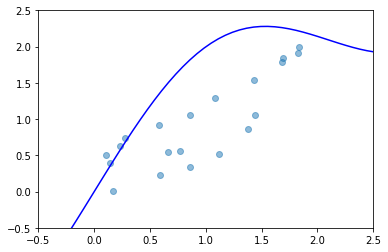

In [58]:
x = np.linspace(-np.pi,np.pi,100)

y = [f_x(i) for i in x]
plt.plot(x,y, 'b')
plt.scatter(data_f, data_y, alpha=0.5)
plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])
plt.show()

(-2.0, 2.0)

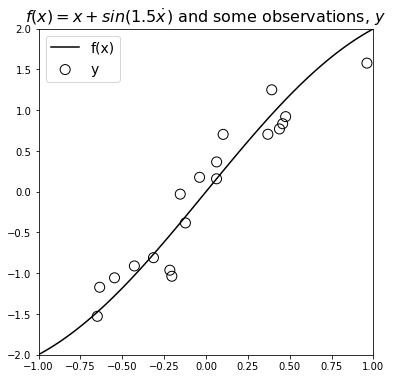

In [63]:
### From the website ??

import numpy as np
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 20
NOISE_STD = .3

x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 1, 100)


def f(x):
    """Base function"""
    return x+ np.sin(x * 1.5)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = x + sin(1.5 \dot x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

### 2-
Use weighted sum of polynomials as an estimator function for f(x), in particular, let the form of estimator function be:
*$g_n(x)=β0 +β1x+β2x_2 +.....+β_nx_n$
Consider four candidate estimators, $g_1,g_3,g_5, and g_{10}$. Estimate the coefficients of each of the four estimators using the sampled dataset and plot $y(x),f(x),g1(x),g3(x),g10(x)$. Which estimator is underfitting ? Which one is overfitting ?

ValueError: x and y must have same first dimension, but have shapes (20,) and (2,)

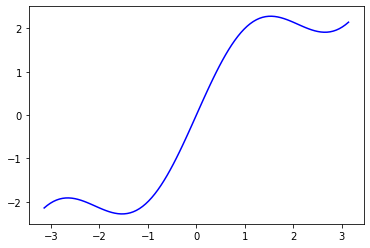

In [49]:
x = np.linspace(-np.pi,np.pi,100)

y = [f_x(i) for i in x]
plt.plot(x,y, 'b')
plt.plot(data_f,np.polyfit(data_f, data_y, 1), 'b')


plt.scatter(data_f, data_y, alpha=0.5)
plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])
plt.show()

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

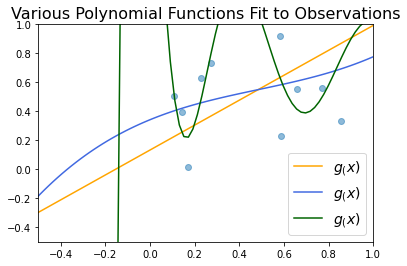

In [56]:
plt.scatter(data_f, data_y, alpha=0.5)

polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(data_f, data_y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-.5, 1])
plt.ylim([-.5, 1])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

### 3. 
Generate 100 datasets (each of size 50) by randomly sampling from y.

(a) Next fit the estimators of varying complexity, i.e., g1 , g2 , ....g15 using the training set for each dataset. Then calculate and plot the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity. 

(b) Identify the best model, i.e., the model with the smallest Mean Squared Error. What is the value of bias and variance for this model?